In [1]:
""" Fit a distribution to Expert's CDF data """
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Expert's CDF data points
xdata = [  10,   20,   28,   38,   50,   65 ]
ydata = [0.09, 0.30, 0.51, 0.72, 0.91, 0.98 ]

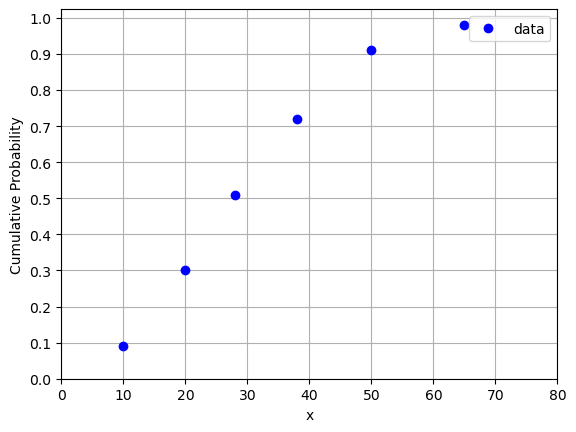

In [2]:
# Visualize the CDF data points
fig0, ax0 = plt.subplots()
ax0.plot(xdata, ydata, 'bo', ms=6, label='data')
ax0.set_xlim(0, 80)
ax0.set_yticks(np.linspace(0, 1, 11))
ax0.set_ylabel("Cumulative Probability")
ax0.set_xlabel("x")
ax0.grid()
ax0.legend()
plt.show()

In [3]:
# First, try fitting a Normal distribution
from scipy.stats import norm
# The CDF to fit
cdf_norm = lambda x, mu, sigma: norm(mu, sigma).cdf(x)

# Fit the data and show results
par_norm, pcov_norm = curve_fit(cdf_norm, xdata, ydata, p0=(50,10))
print("\nFitted Normal Distribution:")
print(f"  mean = {norm(*par_norm).mean():.6f}")
print(f"  sd = {norm(*par_norm).std():.6f}")


Fitted Normal Distribution:
  mean = 28.425794
  sd = 15.480955


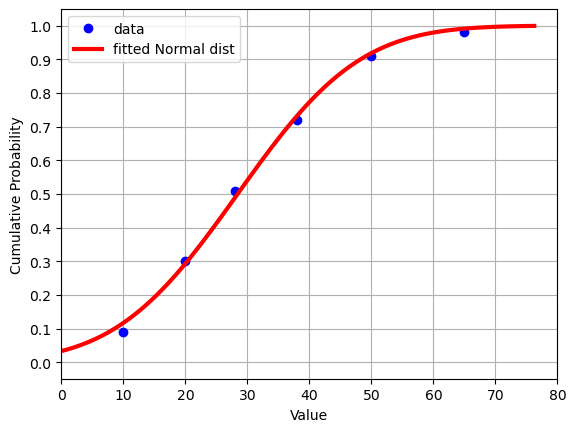

In [4]:
# Visualize the fitted Normal distribution against the data
fig1, ax1 = plt.subplots()
ax1.plot(xdata, ydata , 'bo', ms=6, label='data')
xnorm = np.linspace(norm.ppf(0.001, *par_norm), 
                    norm.ppf(0.999, *par_norm), 100)
ax1.plot(xnorm, norm(*par_norm).cdf(xnorm), 
         'r-', lw=3, label='fitted Normal dist')
ax1.set_xlim(0, 80)
ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel("Cumulative Probability")
ax1.set_xlabel("Value")
ax1.grid()
ax1.legend()
plt.show()

In [5]:
# Try fitting a 4-parameter Beta distribution 
from scipy.stats import beta
# The CDF to fit
cdf_beta = lambda x, a, b, loc, scale : beta(a, b, loc, scale).cdf(x)

# Fit the data and show results
par_beta, pcov_beta = curve_fit(cdf_beta, xdata, ydata, p0=(5,5,0,50))
print("\nFitted 4-parameter Beta Distribution:")
print(f"  a = {par_beta[0]:.6f}")
print(f"  b = {par_beta[1]:.6f}")
print(f"  loc = {par_beta[2]:.6f}")
print(f"  scale = {par_beta[3]:.6f}")
print(f"  mean = {beta(*par_beta).mean():.4f}")
print(f"  sd = {beta(*par_beta).std():.4f}")


Fitted 4-parameter Beta Distribution:
  a = 2.842947
  b = 5.933263
  loc = -3.115719
  scale = 99.784961
  mean = 29.2084
  sd = 14.9350


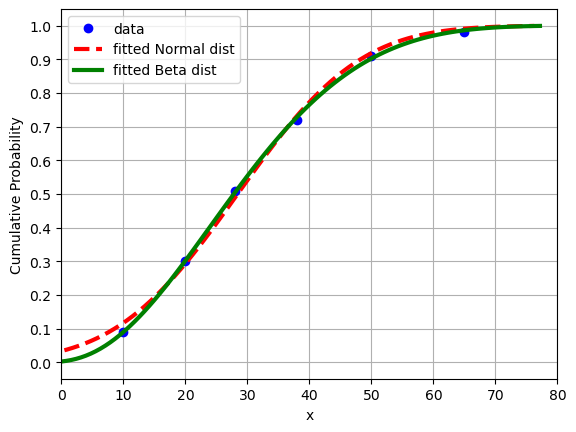

In [6]:
# Visualize the 2 fitted distributions against the data
fig2, ax2 = plt.subplots()
ax2.plot(xdata, ydata , 'bo', ms=6, label='data')
ax2.plot(xnorm, norm(*par_norm).cdf(xnorm), 
         'r--', lw=3, label='fitted Normal dist')
xbeta = np.linspace(beta.ppf(0.001, *par_beta), 
                    beta.ppf(0.999, *par_beta), 100)
ax2.plot(xbeta, beta(*par_beta).cdf(xbeta),
         'g-', lw=3, label='fitted Beta dist')
ax2.set_xlim(0, 80)
ax2.set_yticks(np.linspace(0,1,11))
ax2.set_ylabel("Cumulative Probability")
ax2.set_xlabel("x")
ax2.grid()
ax2.legend()
plt.show()

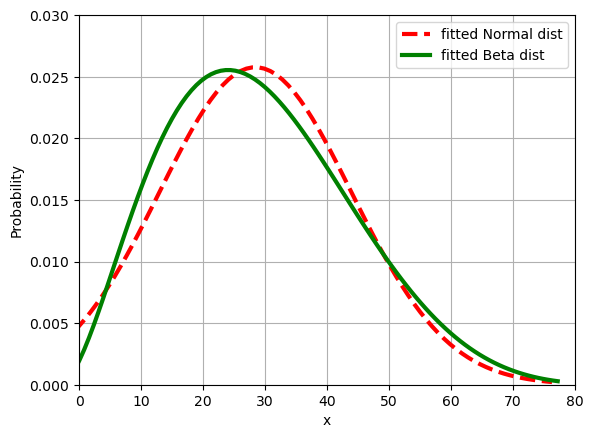

In [7]:
# Compare the PDF of the 2 fitted distributions.
fig3, ax3 = plt.subplots()
ax3.plot(xnorm, norm(*par_norm).pdf(xnorm), 
         'r--', lw=3, label='fitted Normal dist')
ax3.plot(xbeta, beta(*par_beta).pdf(xbeta), 
         'g', lw=3, label='fitted Beta dist')
ax3.set_xlim(0, 80)
ax3.set_ylim(0, 0.03)
ax3.set_ylabel("Probability")
ax3.set_xlabel("x")
ax3.grid()
ax3.legend()
plt.show()